In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.optimize 
%matplotlib inline

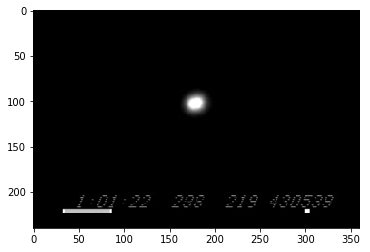

In [2]:
filename = 'snap_00001.png'
img = Image.open(filename).convert('L') 
data = np.asarray(img)

plt.imshow(data, cmap='gray')
plt.savefig('still.pdf')

In [3]:
data[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   5,  14,  24,  36,  54,  71,  90,
       118, 158, 195, 227, 251, 255, 255, 255, 255, 255, 255, 25

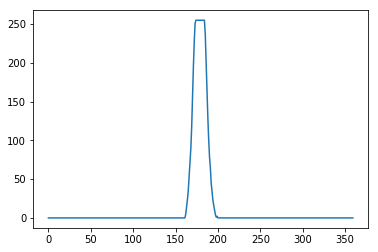

In [4]:
plt.plot(data[100])

In [5]:
#start curve fit routine
#define a gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
#define initial guesses for mean and standard dev.
mean = 180
sigma = 15
x = range(len(data[100]))
y = data[100]
#use guesses and do curve fit
popt, pcov = scipy.optimize.curve_fit(gauss_function, x, y, p0 = [1, mean, sigma])

In [7]:
print('best-fit parameters: ', popt)
print('covariance matrix: ')
print(pcov)

best-fit parameters:  [ 286.18801769  178.69504769    7.41278165]
covariance matrix: 
[[  4.58452684e+00   2.83404837e-08  -7.91661226e-02]
 [  2.83404837e-08   4.10114846e-03  -7.37551046e-10]
 [ -7.91661226e-02  -7.37551046e-10   4.10114845e-03]]


In [8]:
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

uncertainties:  [ 2.14115082  0.06404021  0.06404021]


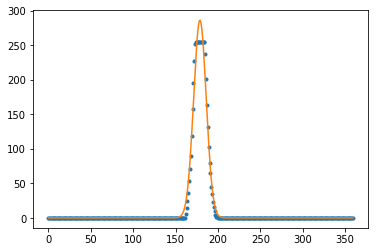

In [9]:
plt.plot(x,y, '.')
plt.plot(x, gauss_function(x, popt[0], popt[1], popt[2]))

In [10]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Start fitting a vertical line. Different way of extracting data - we want the same entry from each list within $data$.

In [11]:
len(data[1])/2

180.0

In [12]:
vertical = [entry[180] for entry in data]    

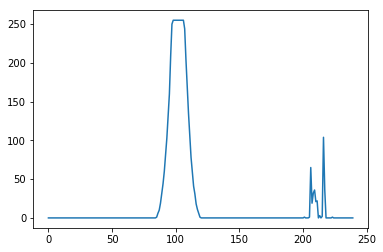

In [13]:
plt.plot(vertical)

In [14]:
#define initial guesses for mean and standard dev.
mean2 = 100
sigma2 = 15
x2 = range(len(data)) #number of entries in data
y2 = vertical #what I just defined
#use guesses and do curve fit
popt2, pcov2 = scipy.optimize.curve_fit(gauss_function, x2, y2, p0 = [1, mean2, sigma2])

In [15]:
print('best-fit parameters: ', popt)
print('covariance matrix: ')
print(pcov)

best-fit parameters:  [ 286.18801769  178.69504769    7.41278165]
covariance matrix: 
[[  4.58452684e+00   2.83404837e-08  -7.91661226e-02]
 [  2.83404837e-08   4.10114846e-03  -7.37551046e-10]
 [ -7.91661226e-02  -7.37551046e-10   4.10114845e-03]]


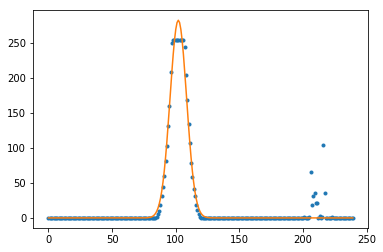

In [16]:
plt.plot(x2,y2, '.')
plt.plot(x2, gauss_function(x2, popt2[0], popt2[1], popt2[2]))

### try to do a 2d gaussian fit

In [17]:
def gaussian2D(xy, a, x0, y0, sigmax, sigmay):
    x, y = xy
    return (a*np.exp(-((x-x0)**2/(2*sigmax**2) + (y-y0)**2/(2*sigmay**2)))).ravel()

In [18]:
x = range(len(data[0]))[:240]
y = range(len(data))
X1, X2 = np.meshgrid(x,y)
size=X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))
xdata = np.vstack((x1_1d, x2_1d))
z=data #dont know what to do with z aaaahhhh
popt, pcov = scipy.optimize.curve_fit(gaussian2D, xdata, data)

ValueError: operands could not be broadcast together with shapes (57600,) (240,360) 

In [19]:
#define initial guesses
a = 250
x0 = 175
y0 = 100
sigmax = 10
sigmay = 10

#use guesses and do curve fit
popt3, pcov3 = scipy.optimize.curve_fit(gaussian2D, (x, y), p0 = [a, x0, y0, sigmax, sigmay])

TypeError: curve_fit() missing 1 required positional argument: 'ydata'

In [20]:
#copying some rando's code from the internet because ours isnt working

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    #total = data.sum()
    #X, Y = np.indices(data.shape)
    x = 180
    y = 100
    #col = data[:, int(y)]
    width_x = 20
    #row = data[int(x), :]
    width_y = 20
    height = 250
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = scipy.optimize.leastsq(errorfunction, params)
    return p

In [21]:
params = fitgaussian(data)
print(params)

[  1.77500683e-04   1.47216169e+02   1.08843229e+02  -9.82715400e+00
   6.56070046e+00]


(250, 0)

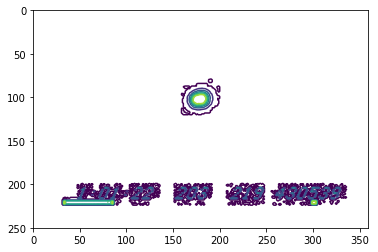

In [22]:
#x,y=np.meshgrid(x,y)
plt.contour(data)
plt.ylim(250,0)

(150, 50)

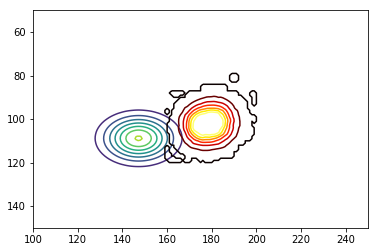

In [23]:
X, Y = np.meshgrid(x,y)
g = gaussian(params[0], params[1], params[2], params[3], params[4])
plt.contour(g(X,Y))
plt.contour(data, cmap=plt.get_cmap('hot'))
plt.xlim(100,250)
plt.ylim(150, 50)

In [24]:
#trying again with stack overflow code from james's link
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

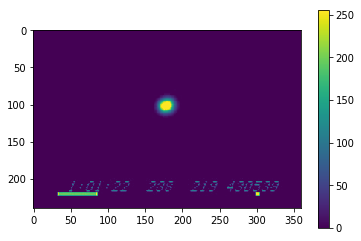

In [25]:
# Create x and y indices
x = range(len(data[0]))
y = range(len(data))
x, y = np.meshgrid(x, y)

##create data
#data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

#use data from image

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data)
plt.colorbar()

In [26]:
initial_guess = (250,175,100,20,20,0,1)

popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), data.reshape(240*360), p0=initial_guess)
print(popt)

[  3.16895630e+02   1.78582994e+02   1.02149231e+02   7.13237032e+00
   6.04571578e+00   2.75339180e-01   1.32212505e+00]


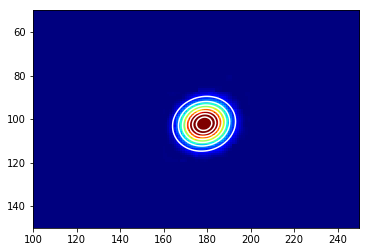

In [27]:
#plotting the fitted data
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
#ax.hold(True)
ax.imshow(data.reshape(240, 360), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(240, 360), 8, colors='w')
plt.xlim(100,250)
plt.ylim(150,50)
plt.show()

In [28]:
#loop over a bunch of images!

#lists to store variables in for plotting vs. time
center_x = []
center_y = []
sigma_x = []
sigma_y = []


for i in range(1,203):
    if i < 10:
        filename = 'movies/stills_vlc-091225-010119/snap_0000{}.png'.format(i)
    elif (i >= 10) and (i < 100):
         filename = 'movies/stills_vlc-091225-010119/snap_000{}.png'.format(i)
    elif (i >= 100):
         filename = 'movies/stills_vlc-091225-010119/snap_00{}.png'.format(i)
    #open image and its data
    img = Image.open(filename).convert('L') 
    data = np.asarray(img)
    
#     #make plots - not necessary
#     plt.imshow(data, cmap='gray')
#     plt.savefig('still.pdf')
    
    #get x and y indices
    x = range(len(data[0]))
    y = range(len(data))
    x, y = np.meshgrid(x, y)
    
    #begin actual fitting routine
    initial_guess = (280,175,100,20,20,0,1)

    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), data.reshape(240*360), p0=initial_guess)
    print('best fit parameters:', popt)

    #add parameters to saving lists
    center_x.append(popt[1])
    center_y.append(popt[2])
    sigma_x.append(popt[3])
    sigma_y.append(popt[4])
    
#     #plotting the fitted data
#     data_fitted = twoD_Gaussian((x, y), *popt)

#     fig, ax = plt.subplots(1, 1)
#     #ax.hold(True)
#     ax.imshow(data.reshape(240, 360), cmap=plt.cm.jet, origin='bottom', 
#               extent=(x.min(), x.max(), y.min(), y.max()))
#     ax.contour(x, y, data_fitted.reshape(240, 360), 8, colors='w')
#     plt.xlim(100,250)
#     plt.ylim(150,50)
#     plt.title(filename)
#     plt.show()


best fit parameters: [  3.16903082e+02   1.78583022e+02   1.02149223e+02   7.13212996e+00
   6.04563318e+00   2.75348226e-01   1.32214842e+00]
best fit parameters: [ 319.07622035  178.1268252   101.64768496    7.28922905    6.21713884
    0.53575355    1.31396388]
best fit parameters: [ 318.79599586  177.73476031  101.68411689    7.51016835    6.07882223
    0.60497874    1.31790095]
best fit parameters: [ 318.4817772   177.70083575  101.66948994    6.07857908    7.52639805
    2.1860954     1.30395811]
best fit parameters: [ 318.28011349  177.69308269  101.67083952    7.53142718    6.08720393
    6.90567722    1.30534569]
best fit parameters: [ 318.11615269  177.68183984  101.67424498    7.54240781    6.08830409
    6.9032341     1.3184017 ]
best fit parameters: [ 317.97087542  177.68544478  101.67274545    7.55612599    6.08878478
    3.76564664    1.31459238]
best fit parameters: [ 315.75484939  177.45658519  101.69400571    6.3023581     7.36353628
    2.14853666    1.32141994]
bes

best fit parameters: [ 320.21483329  179.05868875  103.02364937    6.93250367    6.48352119
  190.38509372    1.32392366]
best fit parameters: [ 317.83781623  179.19857968  103.77207149    6.77941456    6.47769766
  -23.68364373    1.34345271]
best fit parameters: [ 319.02101005  179.08925146  104.00957702    6.95611707    6.4575896
    4.42098598    1.35140921]
best fit parameters: [ 319.022016    179.08925159  104.00957638    6.9562306     6.45769761
    4.42098221    1.34827067]
best fit parameters: [ 319.43339289  179.07847     104.02263431    6.93222902    6.45507034
    4.44460964    1.36841561]
best fit parameters: [ 319.32915224  179.0821427   104.03230197    6.92947086    6.45616889
    4.43562068    1.37087776]
best fit parameters: [ 319.43798572  179.08409657  104.02788194    6.92812643    6.45547091
    4.42362315    1.3562315 ]
best fit parameters: [ 320.53065495  179.02331764  103.82508936    7.01043323    6.51540976
    7.70741897    1.35990759]
best fit parameters: [ 32

best fit parameters: [ 323.11799762  176.8517925   101.94985074    6.636689      6.26135205
   -6.56424521    1.36488808]
best fit parameters: [  3.23057643e+02   1.76853399e+02   1.01951230e+02   6.63823910e+00
   6.26222749e+00  -2.76627673e-01   1.34820116e+00]
best fit parameters: [ 325.17773958  177.54384077  100.9858775     6.51095823    6.42689954
   -1.33512289    1.34223153]
best fit parameters: [ 325.2966447   177.59483321  100.80225947    6.49100361    6.32941174
   -0.49836313    1.32688564]
best fit parameters: [ 325.29658249  177.59483323  100.80225941    6.49099829    6.32940656
   -0.49836305    1.32704999]
best fit parameters: [ 325.20402228  177.59917424  100.79718432    6.49038442    6.34319747
   -0.45680121    1.29417972]
best fit parameters: [ 325.16667769  177.60439076  100.76095996    6.50329919    6.33347533
    2.54070809    1.30048035]
best fit parameters: [ 325.28014798  177.61220407  100.77649152    6.33439408    6.48571702
    1.03484649    1.33750606]
bes

best fit parameters: [ 324.02248214  175.01940912  103.32792688    6.2500285     6.55914516
   -1.51889486    1.32608599]
best fit parameters: [ 324.18359832  175.00765828  103.33125918    6.54399804    6.25177447
    3.17820212    1.32476781]
best fit parameters: [  3.23842487e+02   1.75008002e+02   1.03344440e+02   6.54189830e+00
   6.26805084e+00   2.58666197e-02   1.32567954e+00]
best fit parameters: [ 323.60505512  175.01173837  103.33323233    6.28168018    6.54043689
    4.76363118    1.36249095]
best fit parameters: [  3.19185256e+02   1.75282774e+02   1.03499086e+02   6.27216264e+00
   6.58607645e+00  -1.22856953e-01   1.36591375e+00]
best fit parameters: [  3.19364288e+02   1.75317738e+02   1.03566183e+02   6.23119982e+00
   6.70202604e+00   1.09962664e-02   1.35721002e+00]
best fit parameters: [  3.19366393e+02   1.75317736e+02   1.03566176e+02   6.23139006e+00
   6.70222614e+00   1.09929950e-02   1.35133611e+00]


Text(0.5, 1.0, 'Centroid vs. Time')

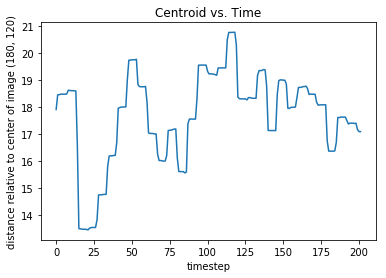

In [29]:
img_center = (180, 120)

#calculate centroid of gaussian relative to center of image using distance formula
centroid = [np.sqrt((x-img_center[0])**2 + (y-img_center[1])**2) for x, y in zip(center_x, center_y)]

#plot vs. time
plt.plot(centroid)
plt.xlabel('timestep')
plt.ylabel('distance relative to center of image {}'.format(img_center))
plt.title('Centroid vs. Time')

Text(0.5, 1.0, 'Focus vs. Time')

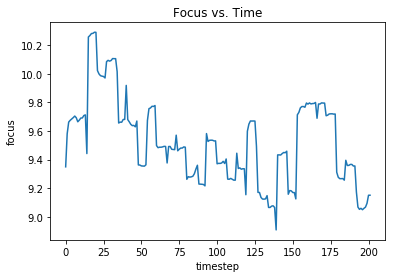

In [30]:
#calculate focus using sigma_x and sigma_y
focus = [np.sqrt(i**2 + j**2) for i, j in zip(sigma_x, sigma_y)]

#plot vs. time
plt.plot(focus)
plt.xlabel('timestep')
plt.ylabel('focus')
plt.title('Focus vs. Time')

In [31]:
import skvideo.io

In [32]:
videodata = skvideo.io.vread('movies/vlc-091225-010119.mp4')

In [33]:
videodatagrey = skvideo.utils.rgb2gray(videodata)

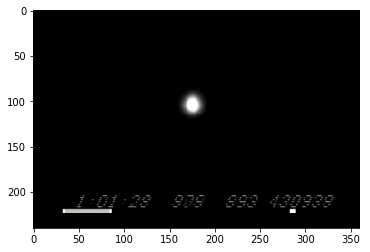

In [34]:
plt.imshow(videodata[200])

In [35]:
import cv2

In [ ]:
ls

In [36]:
img = cv2.imread('movies/stills_vlc-091225-010119/snap_00001.png')

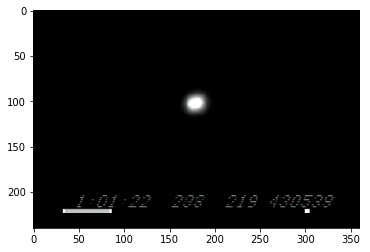

In [37]:
plt.imshow(img)

In [90]:
centerx = []
centery = []
sigx = []
sigy = []

def iter_Gauss(data, i):
    #filename = file
    #img = Image.open(filename).convert('L')
    #data = np.asarray(img)

    # Create x and y indices
    x=range(len(data[0]))
    y=range(len(data))
    x,y = np.meshgrid(x,y)

    # plot twoD_Gaussian data generated above
    #plt.figure()
    #plt.imshow(data)
    #plt.colorbar()

    # add some noise to the data and try to fit the data generated beforehand
    initial_guess = (250,175,100,20,20,0,1) #amp, centerx, centery, sigx,sigy, theta, offset

    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x,y), data.reshape(240*360), p0 = initial_guess)
    print('{}:'.format(i), popt)
    centerx.append(popt[1])
    centery.append(popt[2])
    sigx.append(popt[3])
    sigy.append(popt[4])

    data_fitted = twoD_Gaussian((x, y), *popt)

    fig, ax = plt.subplots(1, 1)
    #ax.hold(True)
    ax.imshow(data.reshape(240,360), cmap=plt.cm.jet, origin='bottom',extent=(x.min(), x.max(), y.min(), y.max()))
    ax.contour(x, y, data_fitted.reshape(240,360), 8, colors='w')
    plt.xlim(100,250)
    plt.ylim(150,50)
    plt.title(i)
    plt.show()

In [91]:
 cap = cv2.VideoCapture('movies/vlc-100106-115345.mp4')

0: [ 326.5048856   162.98156852  114.3395778     3.41843798    2.65898732
  -65.51065496    1.40706964]


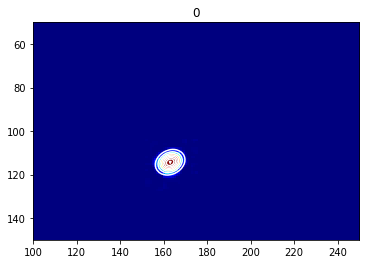

1: [ 321.33672244  162.88263007  114.81573049    2.68289258    3.42244782
  -67.05948666    1.35248003]


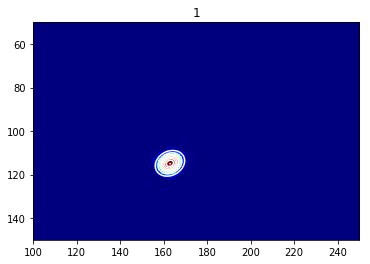

2: [ 326.63746474  162.77443454  115.27776896    3.4398425     2.65725759
  -59.23334644    1.36990318]


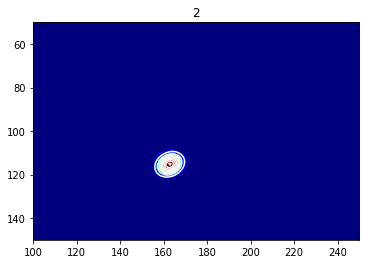

3: [ 326.71239589  162.77541005  115.27805999    3.43690683    2.65802169
  -56.08960684    1.36893436]


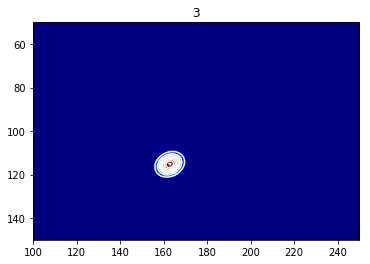

4: [ 327.1125765   162.774388    115.2789481     3.43790882    2.65418324
  -56.0942598     1.30205666]


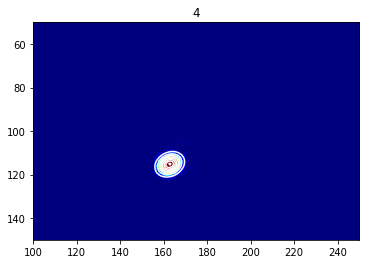

5: [ 327.2799595   162.77413485  115.28071027    2.64919514    3.44226177
  -57.66173164    1.29365298]


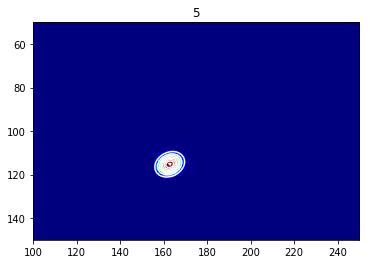

6: [ 327.34122897  162.77189163  115.28171278    3.43907558    2.65092125
  -56.09118699    1.30190065]


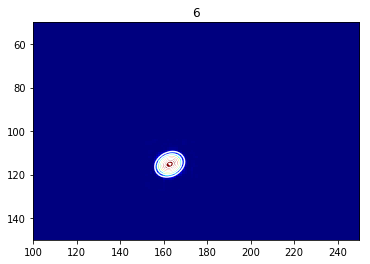

7: [ 327.33260243  162.77095342  115.28206085    2.65075769    3.44025422
  -57.66199325    1.29914925]


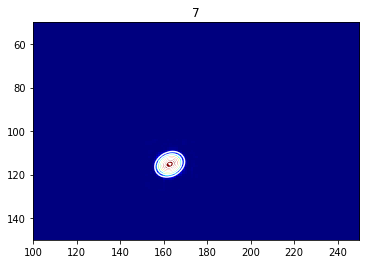

8: [ 328.48122351  163.19457475  114.5394687     2.85991441    3.33468854
  -54.71499065    1.36317882]


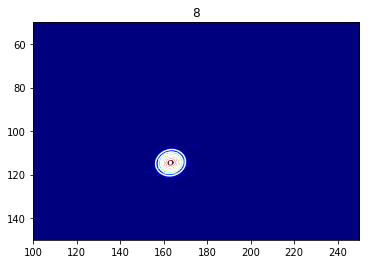

9: [ 326.68883504  163.39074038  114.27149129    2.72354054    3.25779057
  -45.59076971    1.38360486]


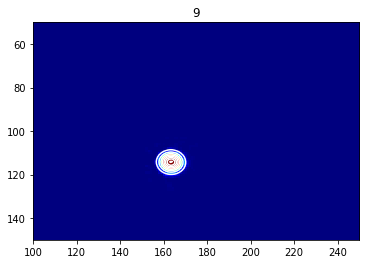

10: [ 326.65439746  163.38920251  114.27164645    3.25748755    2.72343608
  -50.2997025     1.38320295]


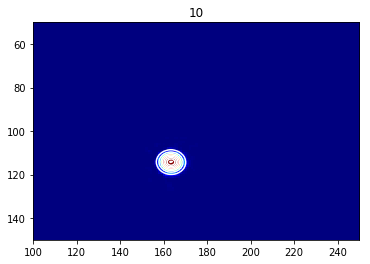

11: [ 326.66791889  163.38921472  114.27165736    3.25714144    2.72319926
  -47.15817374    1.39222808]


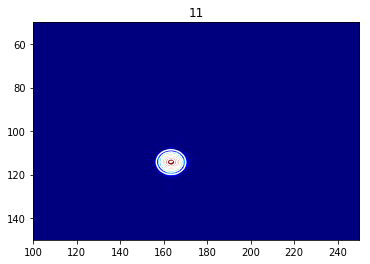

12: [ 326.64420426  163.38920498  114.27164237    2.7229143     3.25687141
  -39.30422604    1.41940081]


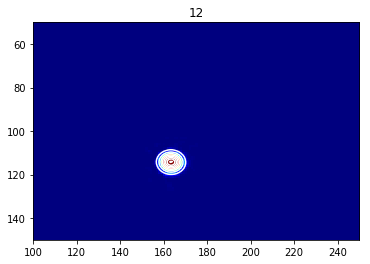

13: [ 326.67001688  163.38921699  114.271657      3.2573298     2.72337438
  -50.29976407    1.38120559]


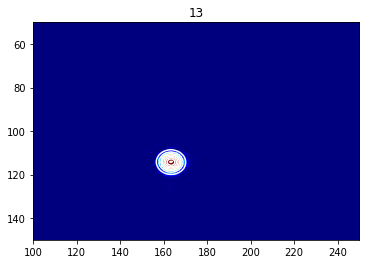

14: [ 318.79664756  163.15852362  114.40376599    3.42790876    2.61687344
  -59.92319617    1.39528588]


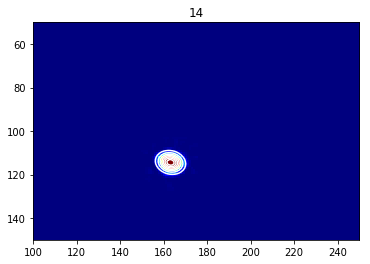

15: [ 318.51194781  160.86307561  114.63080579   -2.67859011   -3.59905627
 -306.24238803    1.42149271]


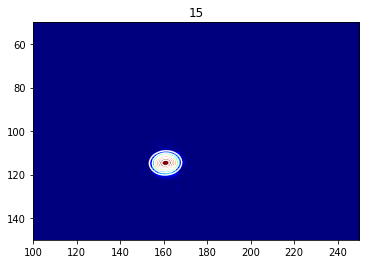

16: [ 318.49292163  160.86504546  114.63110813    2.6794233     3.59846961
 -306.24195696    1.38502587]


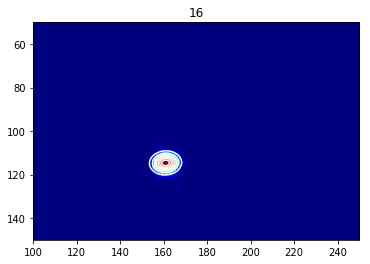

17: [ 318.50466186  160.86507779  114.63112687   -3.59782224   -2.6790401
 -295.2463438     1.40488188]


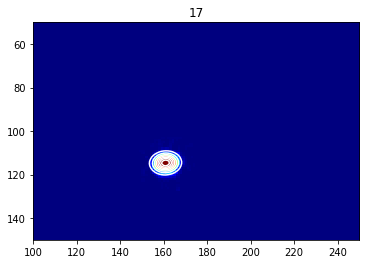

18: [ 318.50180676  160.86507428  114.63112171   -2.6789172    -3.59766117
 -309.38350846    1.41352674]


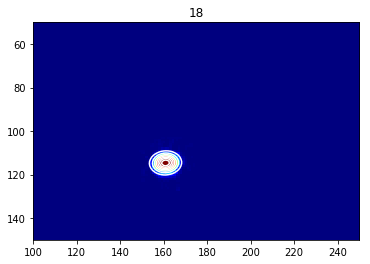

19: [ 318.48879021  160.86503408  114.63110016   -3.59805688   -2.67909818
 -301.52957744    1.40589218]


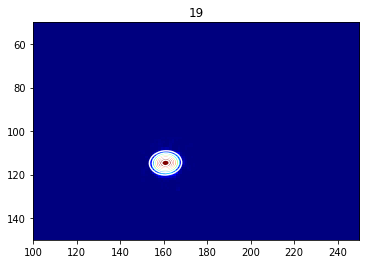

20: [ 318.18079278  160.87010745  114.63201509    2.68013848    3.6017154
 -309.38506574    1.42027305]


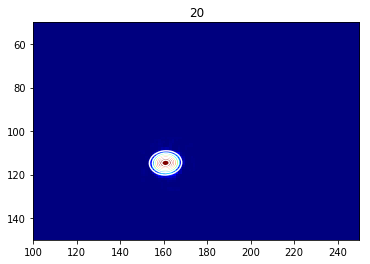

21: [ 308.22276564  161.66124455  114.77543112    2.79033506    3.58478688
 -127.11537894    1.41135909]


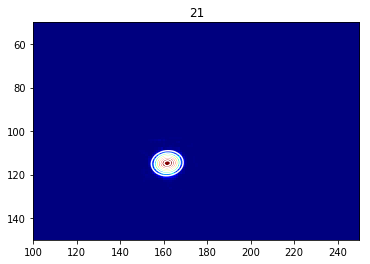

22: [ 314.704817    162.42876466  114.92658182    3.5367283    -2.7696218
  -74.99912211    1.40210684]


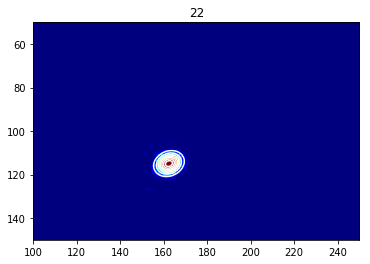

23: [ 315.36819751  162.40153843  114.92904683   -3.5263867    -2.77059348
  -84.41531424    1.37658857]


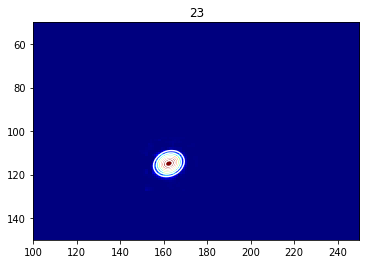

24: [ 314.53838221  162.40228325  114.91736406    2.79894522   -3.52338384
  -73.41267778    1.39185372]


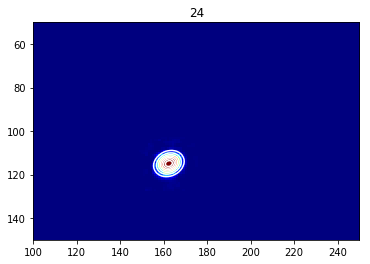

25: [ 314.5462572   162.40228262  114.91738306    3.5238639     2.79936339
  -74.98350581    1.3654529 ]


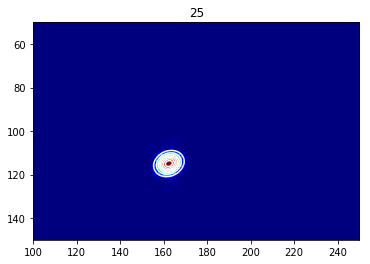

26: [ 314.26220961  162.39366594  114.92828469    3.53447097   -2.8069303
  -74.97794347    1.35369589]


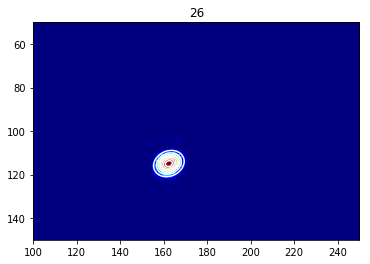

27: [ 314.28011257  162.39363816  114.92828797    3.53439594   -2.80695414
  -74.97790535    1.34573376]


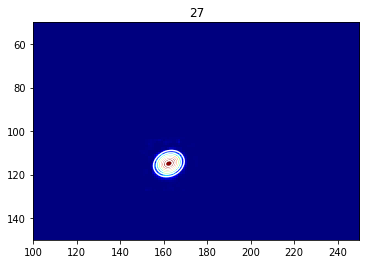

28: [ 317.26862103  162.04436329  114.6111615     2.90747661    3.3753441
 -101.58873271    1.38326036]


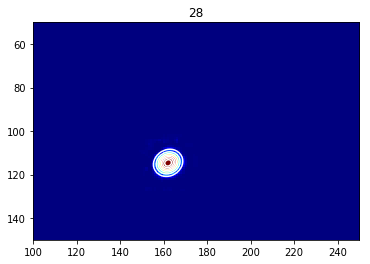

29: [ 317.70058898  162.04099779  114.6174283     3.36681544    2.90752048
 -100.03701696    1.39812887]


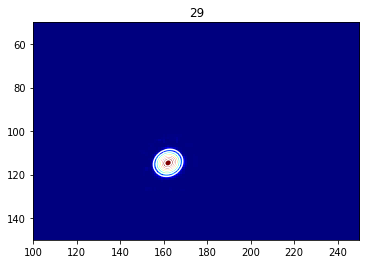

30: [ 317.68965503  162.04100191  114.61741223    3.36639993    2.90712205
 -100.03697342    1.42428344]


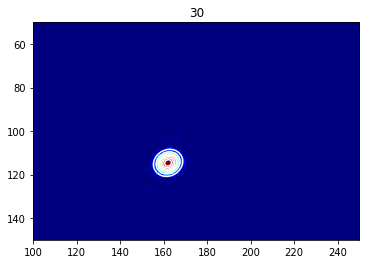

31: [ 317.70136786  162.04099634  114.61743058    3.36687225    2.90755872
 -100.03702648    1.39535459]


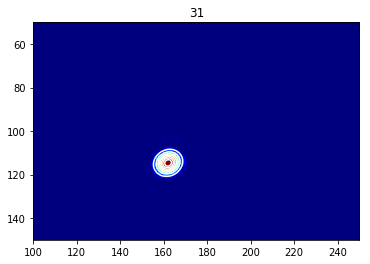

32: [ 317.72256944  162.04205124  114.61597723    3.36657238    2.90735388
 -100.03110993    1.41831542]


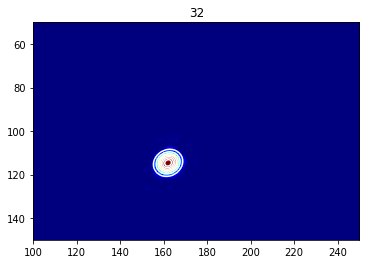

33: [ 318.58792447  162.02799434  114.57808357    2.89803271    3.38342076
 -104.76714688    1.40649677]


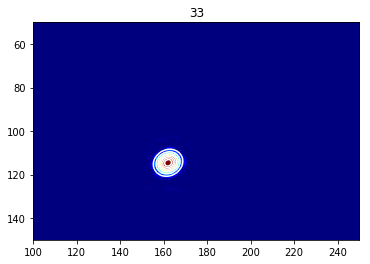

34: [ 310.94327724  162.49451496  114.82578497    3.41421452    2.86568204
  -74.82287466    1.32291428]


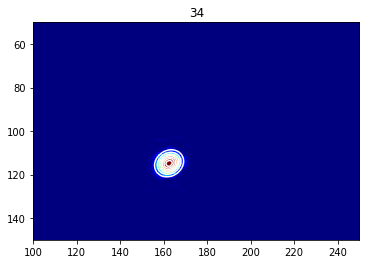

35: [ 312.29904956  162.80625351  115.13312014    3.48518651    2.74667551
  -62.08069265    1.32185414]


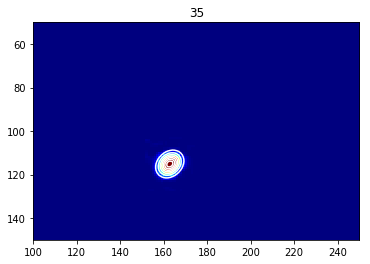

36: [ 312.73215471  162.83638508  115.13420349    2.73086287    3.48185468
  -63.63883867    1.30676321]


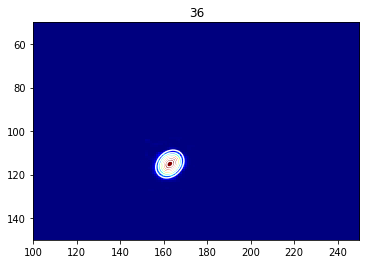

37: [ 312.72456961  162.83641128  115.13419296    3.48109869   -2.73026477
  -65.2096207     1.34466262]


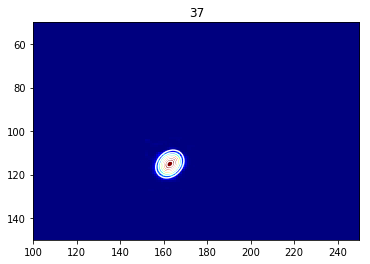

38: [ 312.71887485  162.83642811  115.13418976    2.72988704    3.48062831
  -63.63882458    1.36889273]


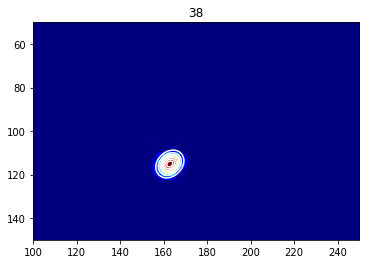

39: [ 312.24772603  162.85798819  115.13132532    2.7335938     3.48203074
  -60.50331544    1.36648897]


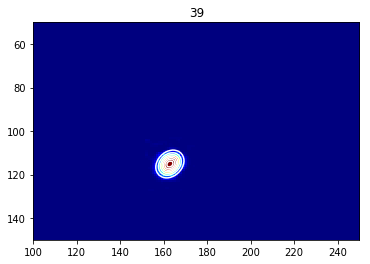

40: [ 312.22434182  162.85803789  115.13120846    2.73340537    3.48203651
  -60.50317139    1.38342907]


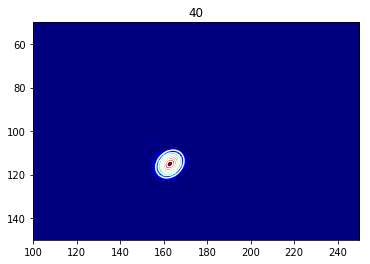

41: [ 303.21251006  161.97465169  114.6022279    -3.53683465   -3.06601817
 -106.66127207    1.39432498]


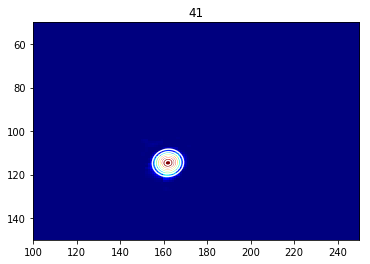

42: [ 301.92997182  161.97300716  114.49732015    3.00121067    3.55905357
 -111.39616945    1.40665939]


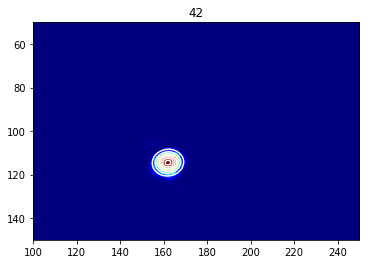

43: [ 301.96334113  161.97266716  114.4937107     3.55953266    2.99895841
 -103.54224036    1.39241454]


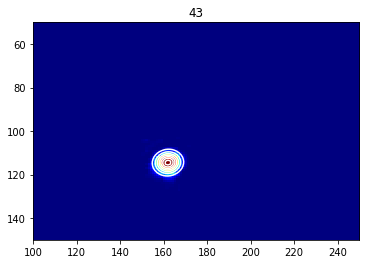

44: [ 301.96195477  161.97264893  114.4936438     2.99870712    3.55915374
 -111.39617383    1.40747185]


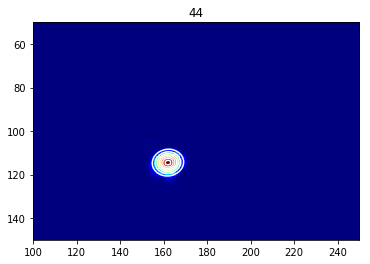

45: [ 301.98436519  161.97216824  114.49342368    2.99870662    3.5588942
 -111.39586493    1.40913853]


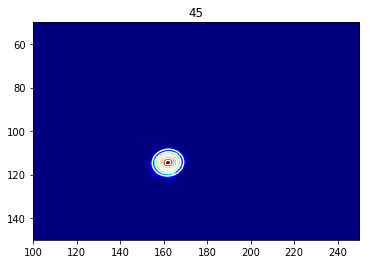

46: [ 301.45527762  161.97127373  114.49283211    3.56804505    2.9986448
 -112.96791289    1.39185723]


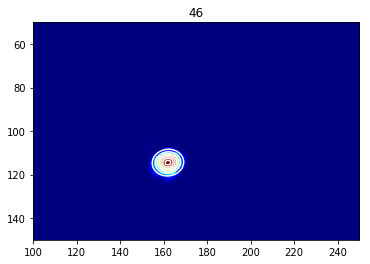

47: [ 294.72194903  161.89611344  114.61082436    2.98916589    3.51566739
 -114.62502497    1.41419794]


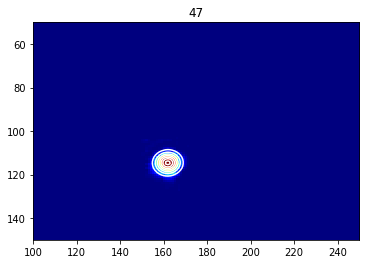

48: [ 300.62615434  161.65785303  114.97983383   -3.39714262   -3.03323463
 -125.401925      1.40469071]


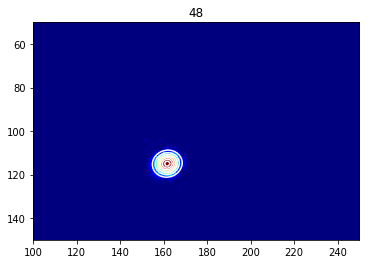

49: [ 300.8960536   161.65806984  114.98471464   -3.03591502   -3.39341365
 -123.83626723    1.41105249]


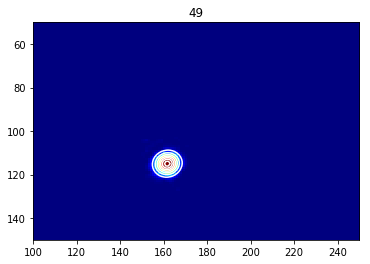

50: [ 301.78033228  161.60696689  114.98623441   -3.3683561    -3.01601079
 -122.29358466    1.42985109]


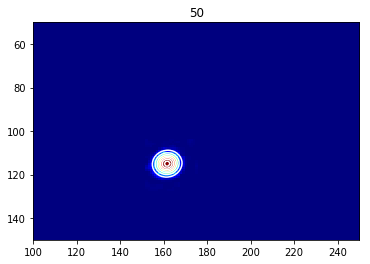

51: [ 301.7753843   161.60697696  114.98623383   -3.01604809   -3.36834255
 -123.86433875    1.43169284]


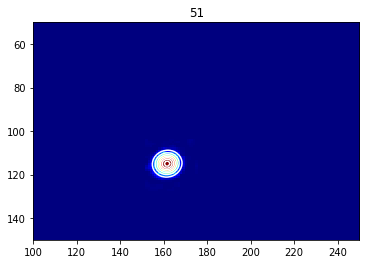

52: [ 301.77949314  161.60696877  114.98623464   -3.36859054   -3.01621953
 -141.14314432    1.41979772]


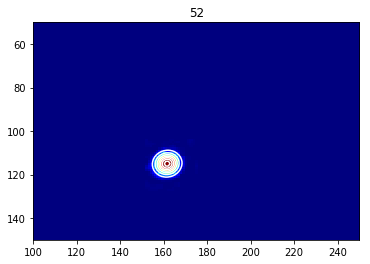

53: [ 301.78647543  161.606917    114.98623467   -3.01641406   -3.36870222
 -133.28900847    1.40893671]


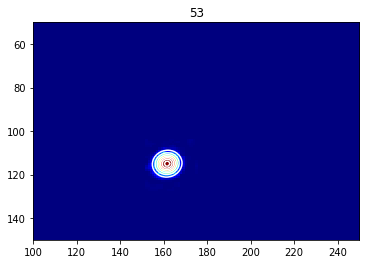

54: [ 285.7183084   161.88660402  114.47354104    3.06244661   -3.54113179
 -142.71373249    1.4220567 ]


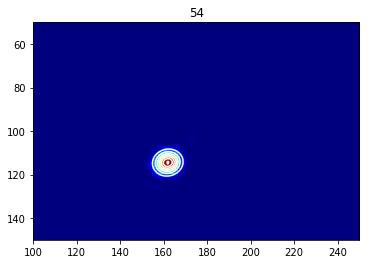

55: [ 270.90421395  162.20094269  114.1931419     2.98122653    3.71772933
 -133.32253721    1.39365157]


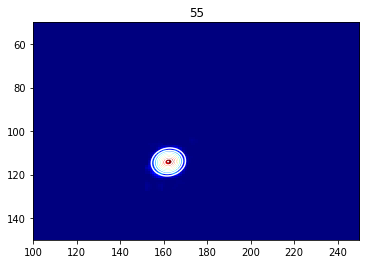

56: [ 271.00634377  162.19439893  114.16498983   -3.71120332   -2.9998256
 -138.04270228    1.38943316]


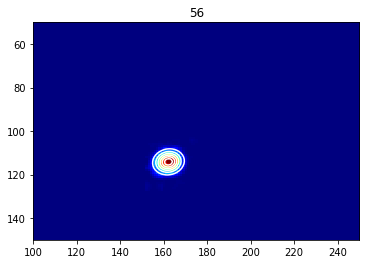

57: [ 271.00114672  162.19446777  114.16497511   -3.71076634   -2.99940571
 -134.90114596    1.4094938 ]


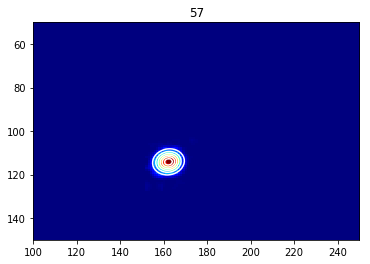

58: [ 270.66775938  162.19984947  114.16357395   -3.00424783   -3.71144105
 -136.47983221    1.41912644]


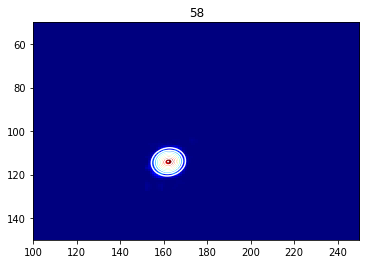

59: [ 270.80121609  162.19859823  114.16141612   -3.00124229   -3.71123335
 -136.48404043    1.44195867]


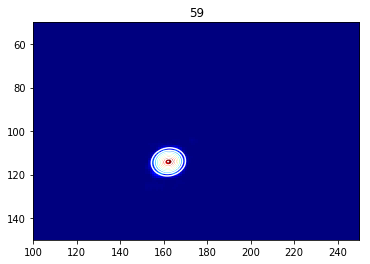

60: [ 270.80072346  162.19861499  114.16140756    3.71084712    3.00093957
 -144.33802738    1.45607855]


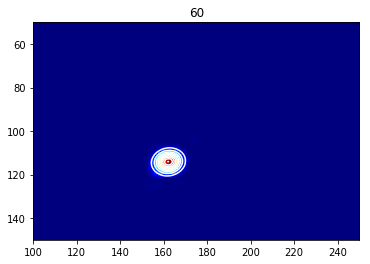

61: [ 233.35545489  160.1820029   114.35867583    4.09051984    3.02114663
  333.40010206    1.42529428]


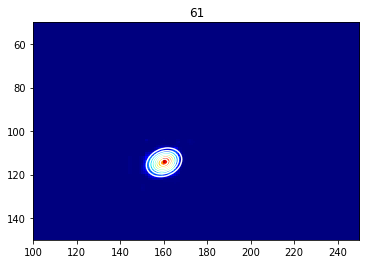

62: [ 232.96629177  160.17525372  114.35286207   -4.08470966   -3.0431789
  330.25426458    1.4476108 ]


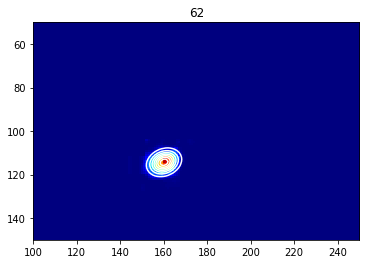

63: [ 232.99144537  160.17255941  114.35969358   -4.08274074   -3.0447848
  333.39196488    1.44596982]


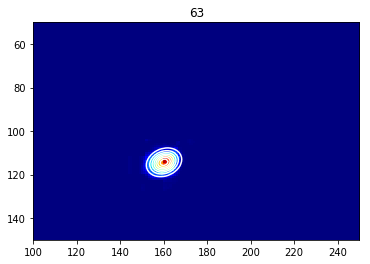

64: [ 233.00119546  160.17225178  114.35983423    4.08465538    3.04613444
  336.53345499    1.38796854]


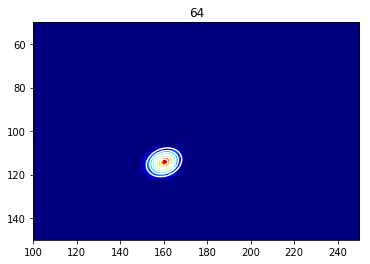

65: [ 233.24285282  160.17567815  114.36207668    3.04706162    4.08433636
  341.24717512    1.36942563]


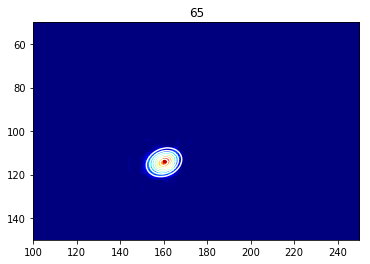

66: [ 233.22179627  160.17706686  114.36205328    4.08428493    3.04647635
  333.39310604    1.37006673]


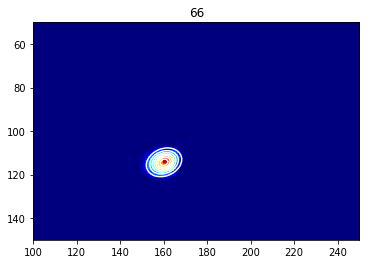

67: [ 244.42957594  161.01910367  114.76016315   -3.77886616   -3.10151576
 -492.80988553    1.40664503]


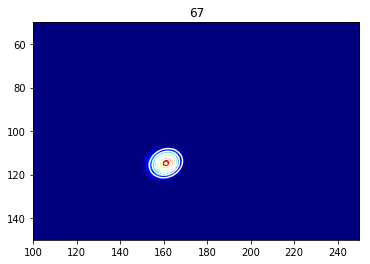

68: [ 272.9476755   161.7196686   115.09488602   -3.00703343   -3.57136583
 -129.74605824    1.42946083]


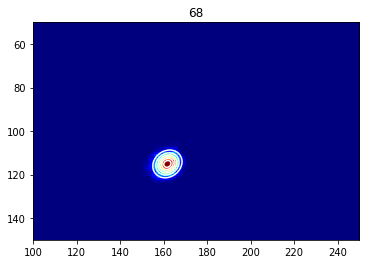

69: [ 272.69657468  161.68798797  115.09782206    3.59198297    3.01574048
 -131.34286113    1.43836309]


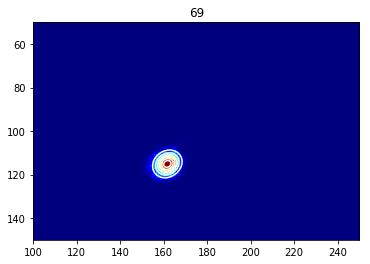

70: [ 272.69582697  161.68798031  115.09780546    3.59185543    3.01559979
 -131.34285655    1.44434193]


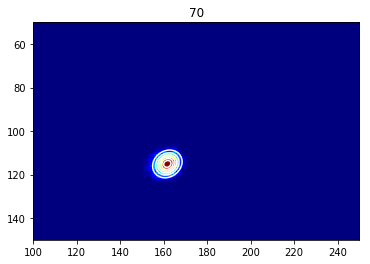

71: [ 272.69416921  161.68800572  115.09780111    3.59159404    3.01537267
 -125.05969238    1.45526657]


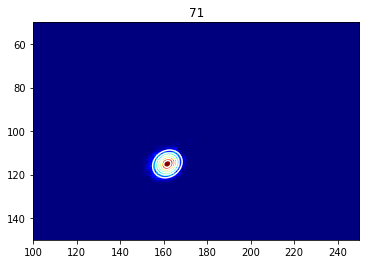

72: [ 272.94377705  161.68772799  115.09741699    3.58895269    3.01337308
 -131.3443692     1.47645862]


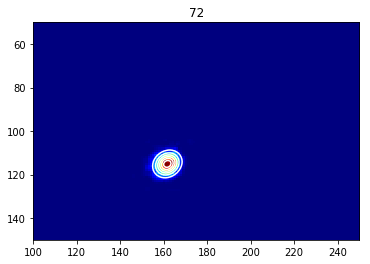

73: [ 272.94986091  161.68752145  115.09743807    3.59004905    3.01431693
 -131.34438352    1.43119407]


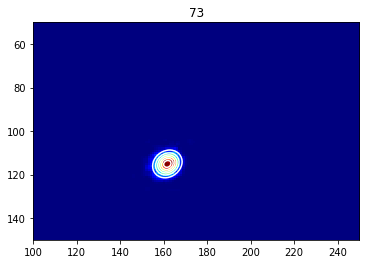

74: [ 289.02130141  163.23328209  114.41994114    3.44741296    2.99475249
  -56.18799524    1.44746084]


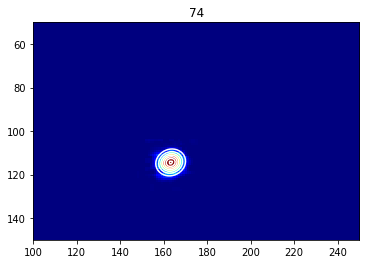

75: [ 291.28023407  163.24729486  114.38626054    2.95012581    3.42476803
  -57.81780021    1.46024184]


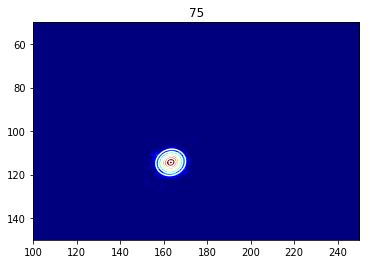

76: [ 291.41699099  163.24666773  114.38693043    2.94908958    3.4248158
  -57.82051042    1.42944989]


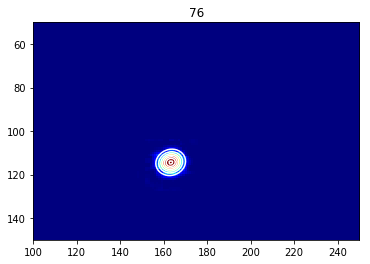

77: [ 291.41347662  163.2466719   114.38690892    2.94870544    3.42438098
  -57.82048369    1.44994743]


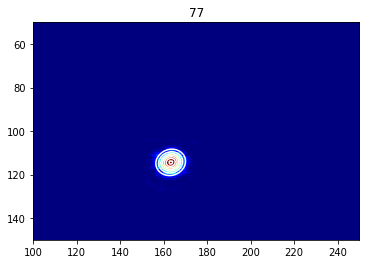

78: [ 291.41196083  163.2466737   114.38689972    2.94854082    3.42419482
  -57.82047208    1.45873351]


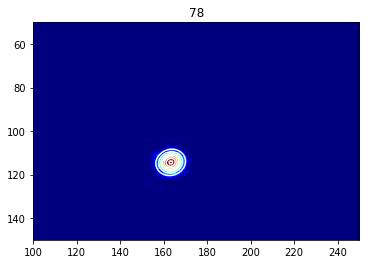

79: [ 291.48195879  163.24841197  114.38776713    2.9472446     3.42312136
  -57.81646217    1.45501183]


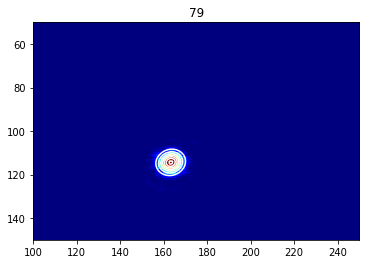

80: [ 295.22954188  163.18934173  114.35150461    2.98062688    3.37780968
  -61.0999598     1.4805328 ]


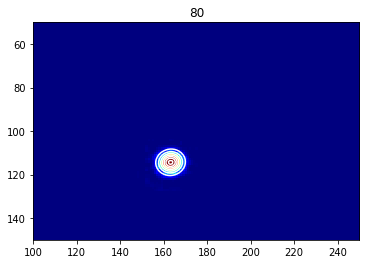

81: [ 306.44563318  163.09823005  114.46872359    3.3211858     3.06712082
  -59.37095117    1.47420573]


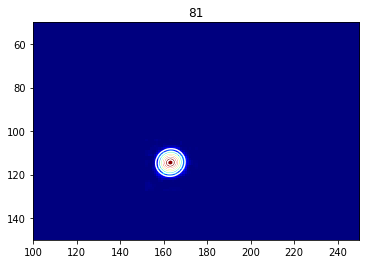

82: [ 305.8549492   163.09970486  114.48315486    3.08553693    3.32297252
  -54.64511858    1.45721126]


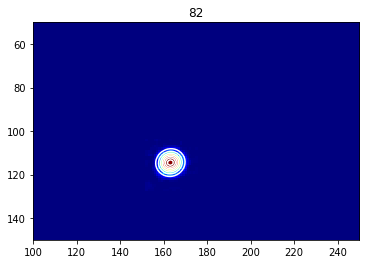

83: [ 305.87612214  163.09970992  114.48294091    3.0855106     3.32255202
  -54.64405165    1.4610226 ]


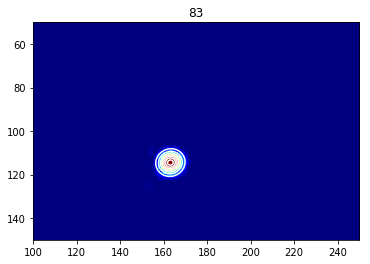

84: [ 305.87323082  163.09970339  114.4829343     3.08532006    3.32234749
  -54.64405287    1.47189778]


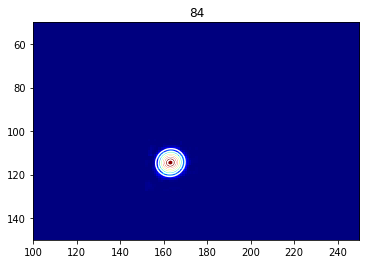

85: [ 305.98380439  163.09590678  114.48420416    3.08603197    3.32412925
  -54.64322533    1.43500861]


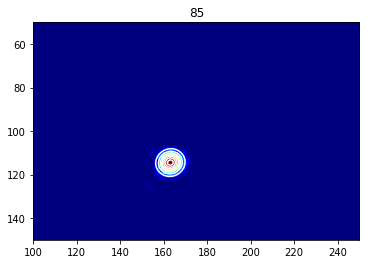

86: [ 306.00134586  163.09592606  114.4842428     3.08642111    3.32458148
  -54.64329647    1.40619766]


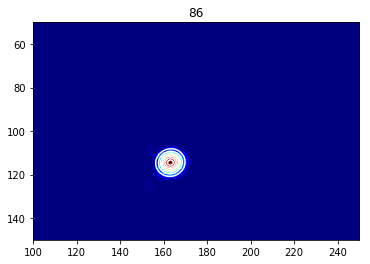

87: [ 296.06576222  164.08601703  113.99636168    3.5450918     3.05423511
  -34.14067204    1.45485164]


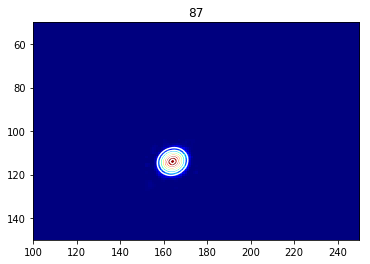

88: [ 296.8197189   164.67242518  113.86711405    3.04801008    3.40803398
  -26.95063678    1.44965425]


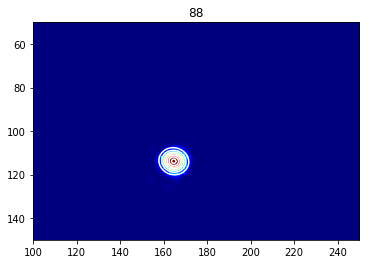

89: [ 296.84297993  164.67561225  113.86867598    3.40160737    3.05049209
  -28.51878665    1.48407869]


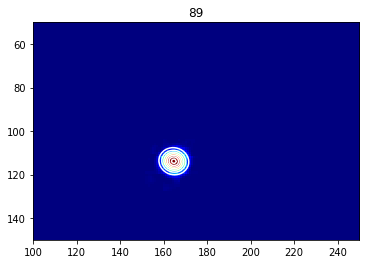

90: [ 296.84367908  164.67562898  113.86869897    3.40152708    3.05035078
  -28.51871923    1.48892065]


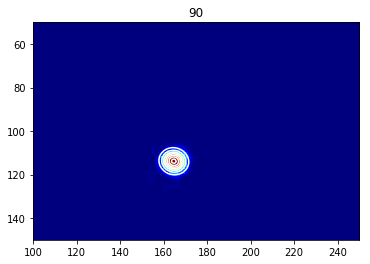

91: [ 296.84854374  164.67563402  113.86868761    3.40209159    3.05091168
  -28.51873406    1.46052816]


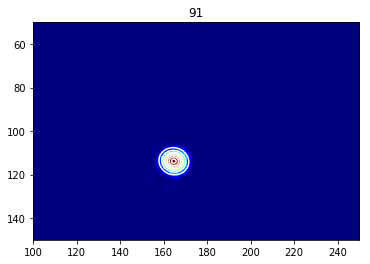

92: [ 296.84511572  164.6756264   113.8687028     3.40153809    3.05037815
  -28.51869642    1.48729693]


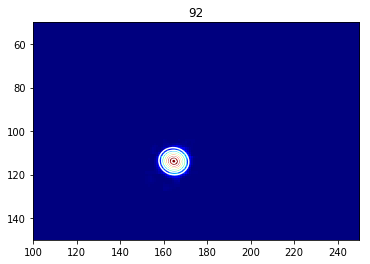

93: [ 296.856362    164.67566021  113.86866471    3.40308283    3.05186153
  -28.51878449    1.41189216]


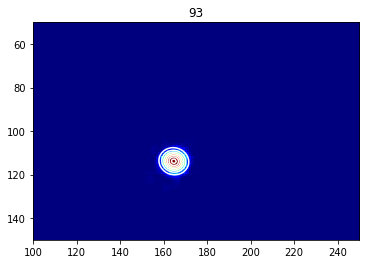

94: [ 286.51958625  163.56478342  114.63970499    3.03809562   -3.58468227
  -44.90058282    1.30433021]


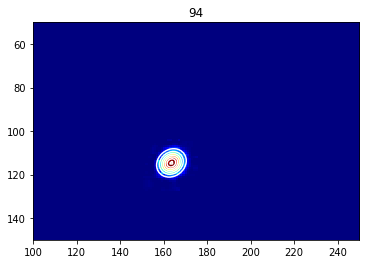

95: [ 285.67630086  163.5451965   114.65241452    3.04605916    3.60890589
  -38.61655239    1.33792987]


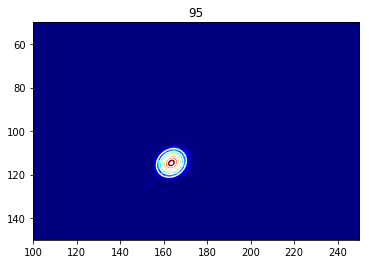

96: [ 285.6713399   163.54517831  114.6524674     3.60817836    3.04539622
  -37.04570769    1.37035595]


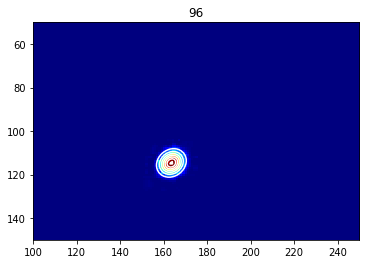

97: [ 285.65991595  163.54515996  114.65249845    3.04463329    3.60735511
  -38.61656166    1.4102544 ]


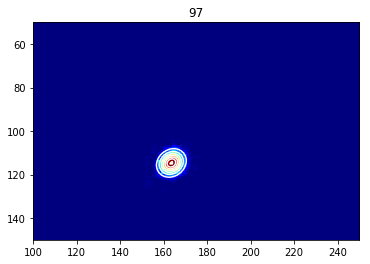

98: [ 285.65729531  163.54515291  114.65250402    3.04457312    3.6072925
  -38.61657061    1.41421194]


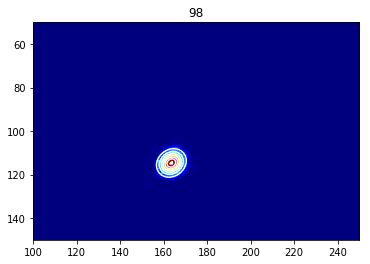

99: [ 285.58760735  163.54412795  114.65169857    3.04472479    3.60721544
  -38.61764522    1.42570774]


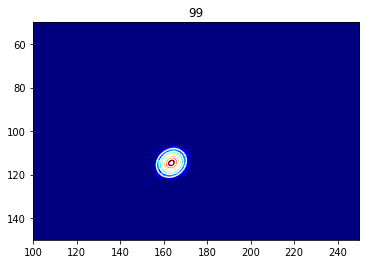

100: [ 288.93368349  163.15215362  113.95368586    3.07003853    3.5252601
  -63.34610104    1.40139179]


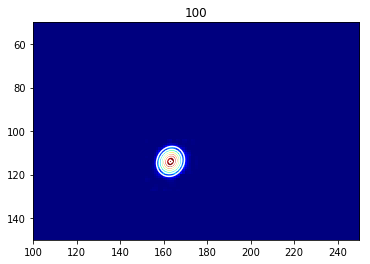

101: [ 301.05408002  162.83252496  113.26604371    3.50743739   -2.89690891
  -96.14726019    1.42730502]


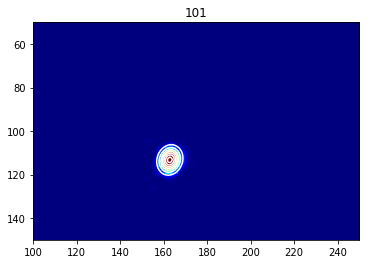

102: [ 301.28386     162.82845297  113.26864645    2.89360685    3.50287262
  -97.7105777     1.44253972]


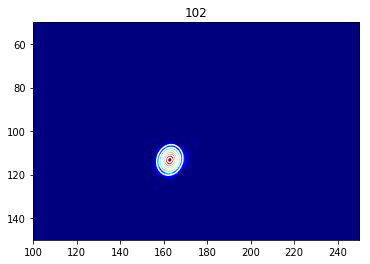

103: [ 301.2902415   162.82846822  113.26867061    3.50383641   -2.89442126
  -96.13979104    1.39742303]


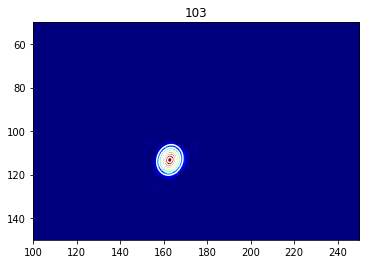

104: [ 301.44488358  162.82202472  113.26684716   -2.89546216   -3.50001479
 -110.2676476     1.42502887]


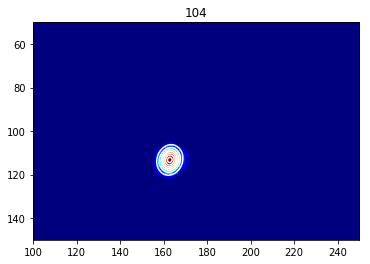

105: [ 301.44581933  162.82201786  113.26685437    3.49978604    2.89530875
 -108.69682254    1.43348152]


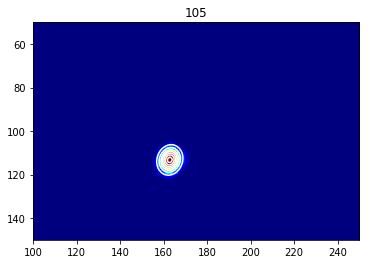

106: [ 301.45962302  162.82201583  113.2669184     3.50029322    2.89585759
 -111.83839738    1.40137125]


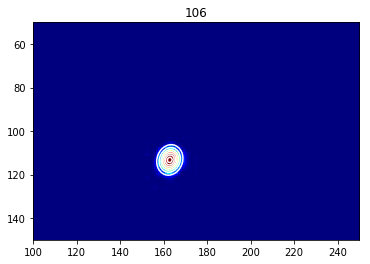

107: [ 310.00583417  163.17555487  112.70155911    3.38713347    2.96345508
 -121.38798549    1.43469263]


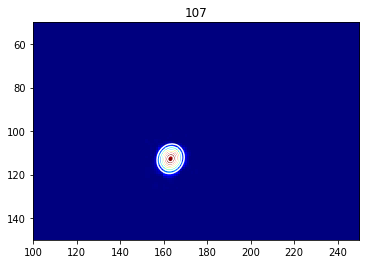

108: [ 310.17423089  163.16996527  112.70153328    3.38098387    2.96999511
 -105.67391601    1.41804692]


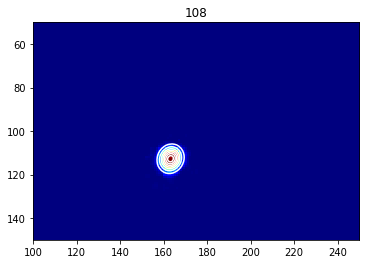

109: [ 310.1719914   163.16995321  112.70156421    2.96978261    3.38070582
 -107.24480396    1.43109304]


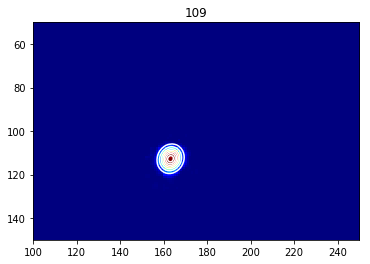

110: [ 310.30563536  163.16558847  112.70402924    2.96849321    3.38242971
 -104.1063447     1.46357102]


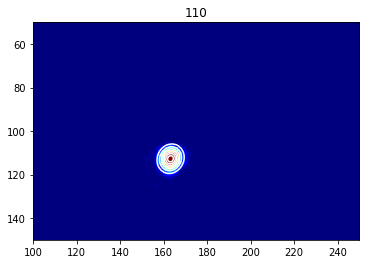

111: [ 311.57493799  163.16793986  112.68918469    2.96908374   -3.36370372
 -122.98129884    1.45288651]


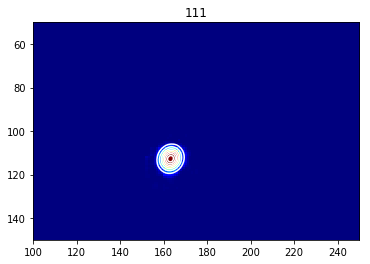

112: [ 311.58028392  163.16794933  112.68917169    3.36420836   -2.96949877
 -124.55199002    1.42764368]


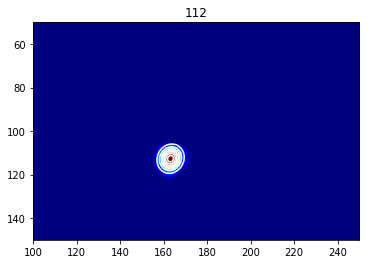

113: [ 307.01659107  163.63616539  113.14537278   -3.39520038    3.04058227
  -62.05264678    1.43842378]


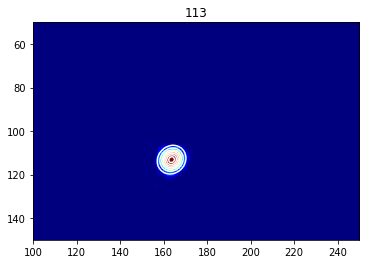

114: [ 315.55085947  164.0934175   113.53004695    3.44760021    2.97366957
  -46.69549318    1.42858443]


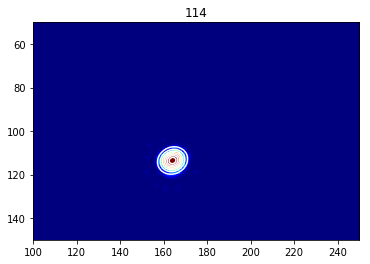

In [ ]:
#note that this cell always throws an error when it's done running
#don't worry as long as you ran the cell above first
i = 0
final = []
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    #print(ret, frame)
    # Our operations on the frame come here
    data = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(gray)
    final.append(data)
    iter_Gauss(data, i)
    i+=1
    # Display the resulting frame
    cv2.imshow('frame',data)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


Text(0.5, 1.0, 'Centroid vs. Time')

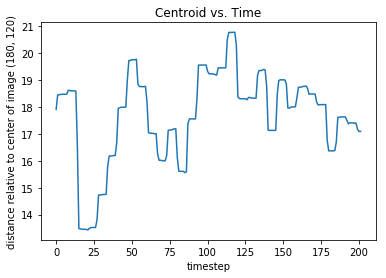

In [84]:
img_center = (180, 120)

#calculate centroid of gaussian relative to center of image using distance formula
centroid = [np.sqrt((x-img_center[0])**2 + (y-img_center[1])**2) for x, y in zip(centerx, centery)]

#plot vs. time
plt.plot(centroid)
plt.xlabel('timestep')
plt.ylabel('distance relative to center of image {}'.format(img_center))
plt.title('Centroid vs. Time')

Text(0.5, 1.0, 'Focus vs. Time')

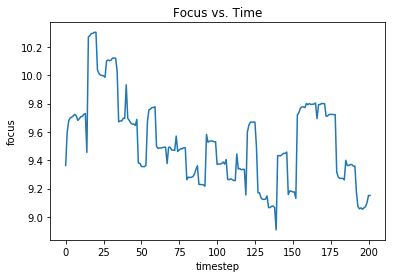

In [87]:
#calculate focus using sigma_x and sigma_y
focus = [np.sqrt(i**2 + j**2) for i, j in zip(sigx, sigy)]

#plot vs. time
plt.plot(focus)
plt.xlabel('timestep')
plt.ylabel('focus')
plt.title('Focus vs. Time')

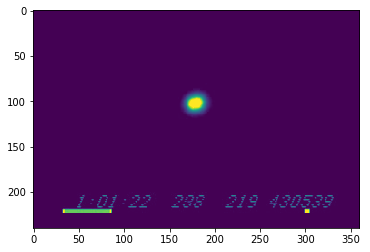